In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("muse_with_english_lyrics_only.csv")

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df["lyrics"], df["final_emotion"], 
    test_size=0.2, random_state=42, stratify=df["final_emotion"]
)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [5]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [ ]:
model = LinearSVC(class_weight='balanced')

In [7]:
model.fit(X_train_tfidf, y_train)
preds = model.predict(X_test_tfidf)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       anger       0.18      0.13      0.15       569
        calm       0.15      0.14      0.15      1034
  excitement       0.19      0.18      0.18      1247
        fear       0.13      0.06      0.08       294
         joy       0.22      0.26      0.24      1451
     neutral       0.14      0.12      0.13       952
  reflective       0.17      0.18      0.17      1301
    romantic       0.19      0.18      0.18       734
     sadness       0.22      0.26      0.24      1517

    accuracy                           0.19      9099
   macro avg       0.18      0.17      0.17      9099
weighted avg       0.18      0.19      0.18      9099



              precision    recall  f1-score   support

       anger       0.18      0.13      0.15       569
        calm       0.15      0.14      0.15      1034
  excitement       0.19      0.18      0.18      1247
        fear       0.13      0.06      0.08       294
         joy       0.22      0.26      0.24      1451
     neutral       0.14      0.12      0.13       952
  reflective       0.17      0.18      0.17      1301
    romantic       0.19      0.18      0.18       734
     sadness       0.22      0.26      0.24      1517

    accuracy                           0.19      9099
   macro avg       0.18      0.17      0.17      9099
weighted avg       0.18      0.19      0.18      9099

Confusion Matrix:
 [[ 73  49  98   7  78  69  76  30  89]
 [ 22 149 112  10 200  65 170  98 208]
 [ 69 106 223  11 252 105 174  95 212]
 [ 16  22  26  17  39  39  61  11  63]
 [ 48 162 193  13 382 116 178 110 249]
 [ 54  98 134  19 167 111 125  51 193]
 [ 48 160 149  19 224 120 231  82 268]
 [ 

<Figure size 1200x800 with 0 Axes>

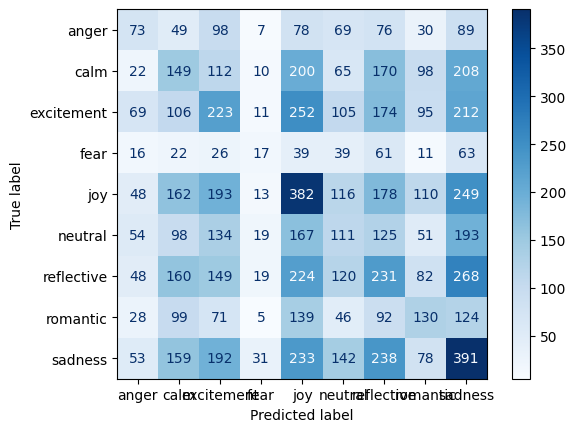

In [13]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(12, 8))  # adjust width x height in inches

# Train model
model.fit(X_train_tfidf, y_train)

# Predict
preds = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm)
# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(preds_classes)